In [1]:
# -*- coding: utf8

import seaborn as sns
from scipy import stats as ss

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula 17 - Verossimilhança

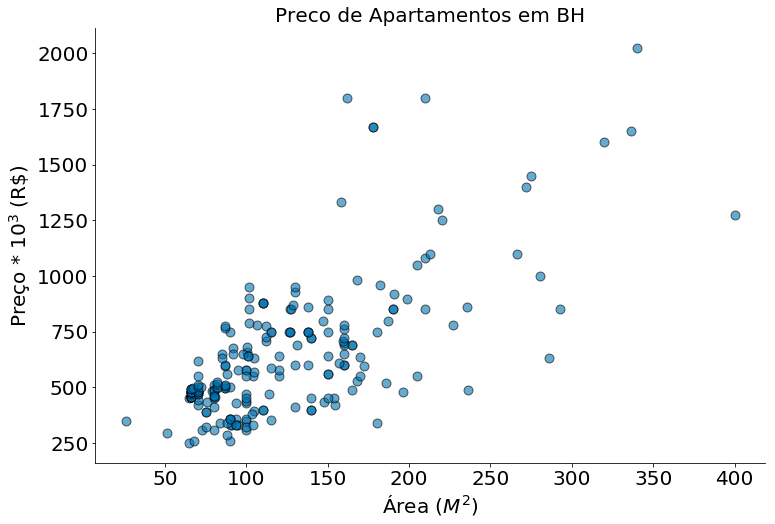

In [4]:
df = pd.read_csv('aptosBH.txt', index_col=0)
df['preco'] = df['preco'] / 1000
plt.scatter(df['area'], df['preco'], edgecolors='k', s=80, alpha=0.6)
plt.title('Preco de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')
despine()

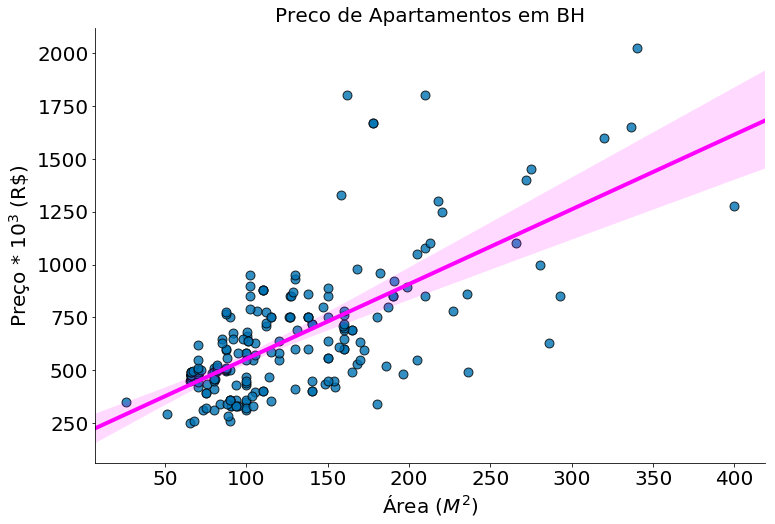

In [5]:
sns.regplot(x='area', y='preco', data=df, n_boot=10000,
            line_kws={'color':'magenta', 'lw':4},
            scatter_kws={'edgecolor':'k', 's':80, 'alpha':0.8})
plt.title('Preco de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')
despine()

In [6]:
ss.linregress(df['area'], df['preco'])

LinregressResult(slope=3.535719156333653, intercept=200.52361368989432, rvalue=0.69460563796064556, pvalue=1.917920339304021e-32, stderr=0.250321067300947)

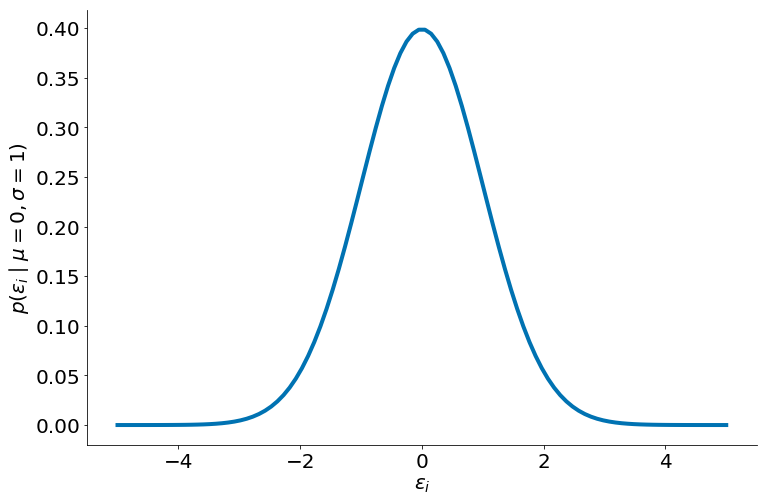

In [7]:
x = np.linspace(-5, 5, 100)
plt.plot(x, ss.distributions.norm.pdf(x, scale=1))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma=1)$')

despine()

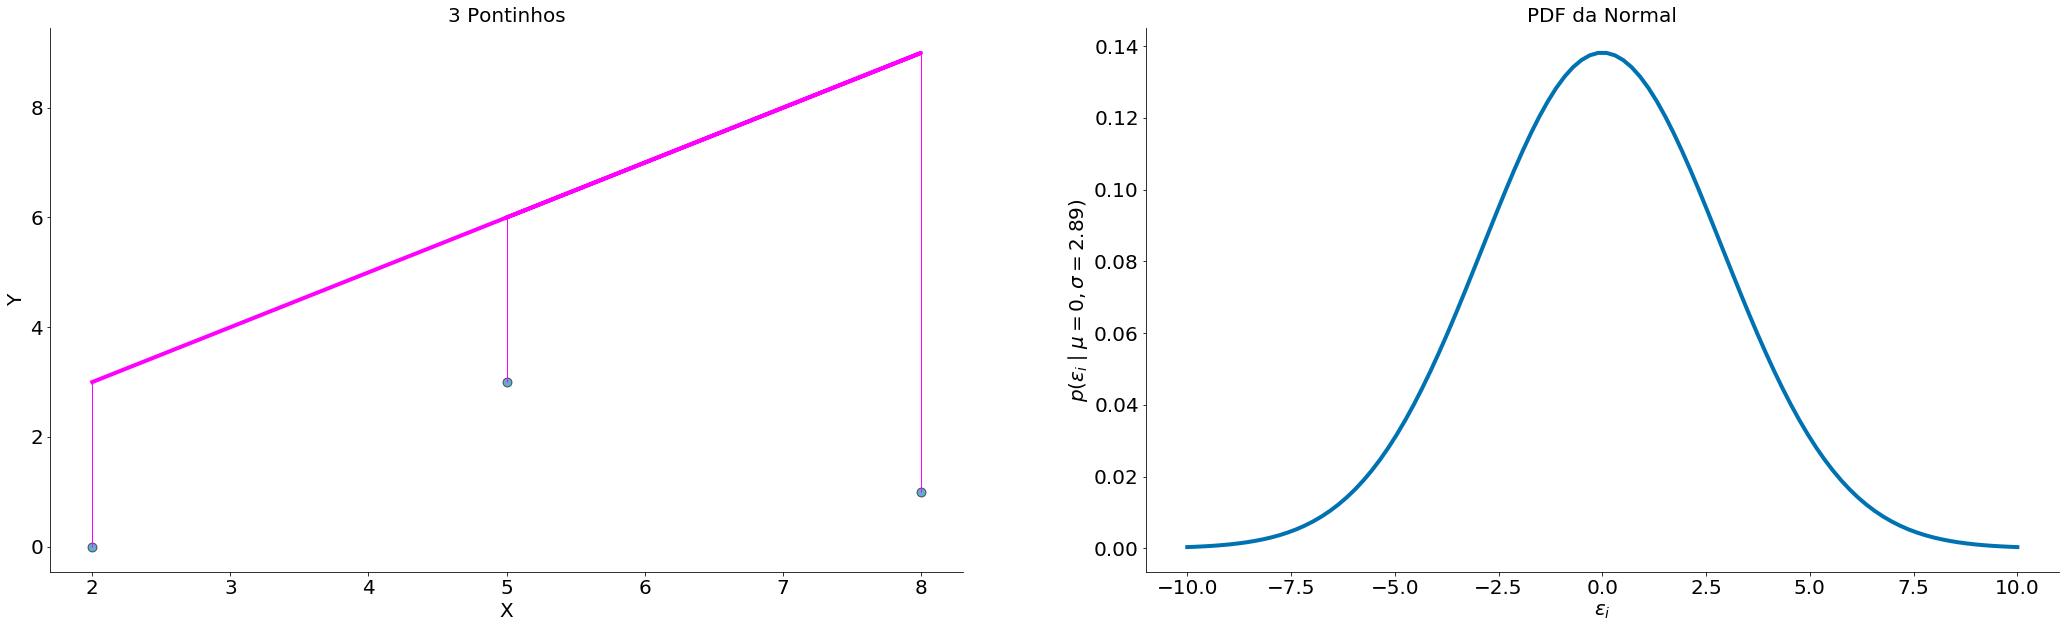

In [8]:
beta = 1
alpha = 1

fig = plt.figure(figsize=(36, 10))

x = np.array([2, 8, 5])
y = np.array([0, 1, 3])

plt.subplot(121)
plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('3 Pontinhos')
plt.ylabel(r'Y')
plt.xlabel(r'X')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

plt.subplot(122)
plt.title('PDF da Normal')
ei_x = np.linspace(-10, 10, 100)
sigma = (y - y_bar).std(ddof=1)
plt.plot(ei_x, ss.distributions.norm.pdf(ei_x, scale=sigma))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma={})$'.format(np.round(sigma, 2)))
despine()

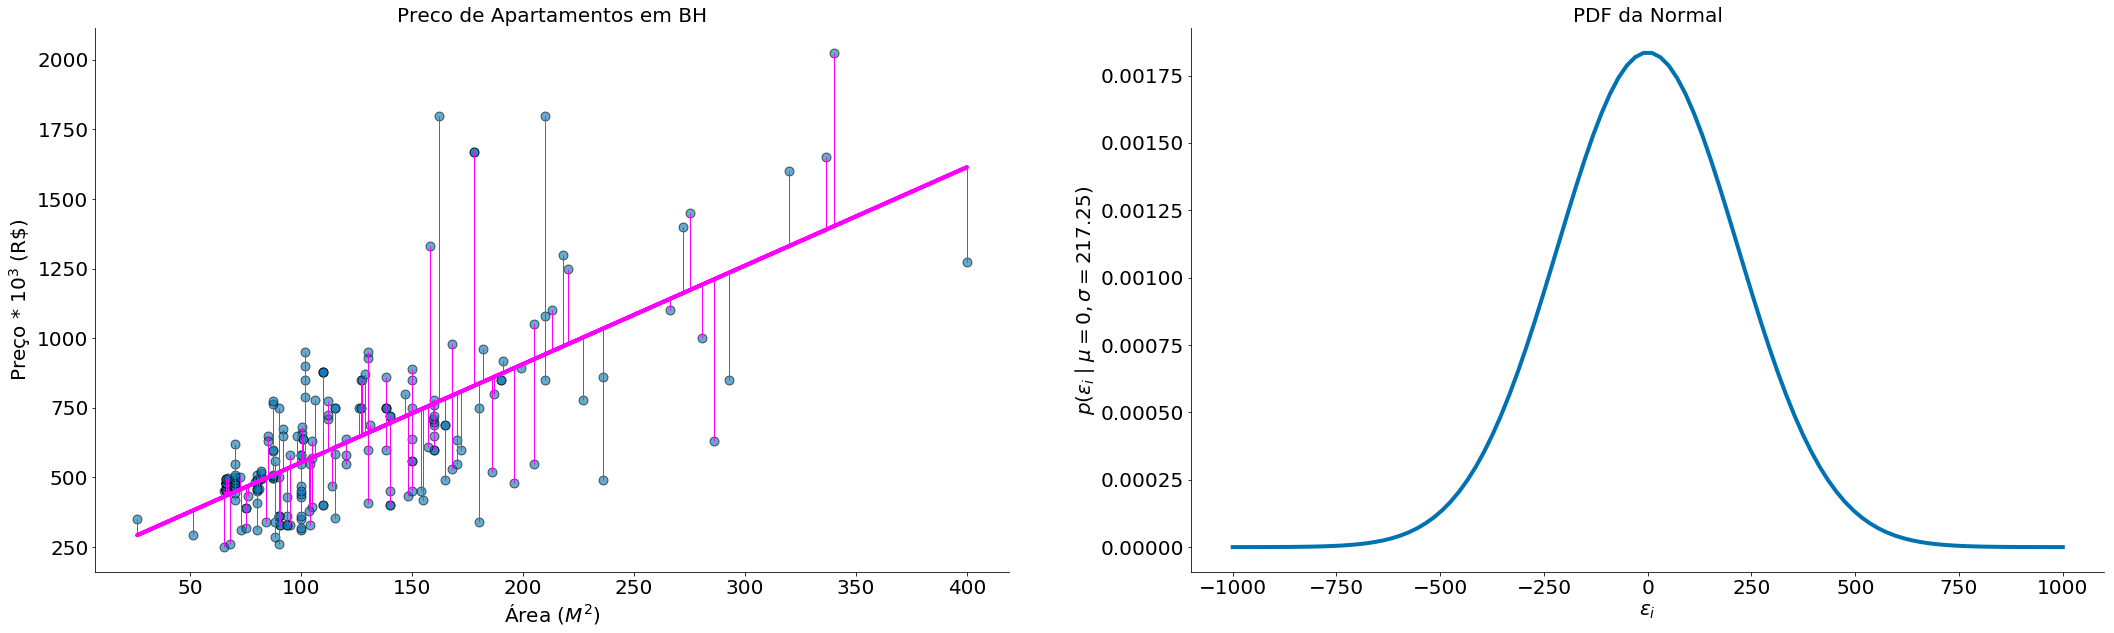

In [9]:
beta = 3.535719156333653
alpha = 200.52361368989432

fig = plt.figure(figsize=(36, 10))

x = df['area']
y = df['preco']

plt.subplot(121)
plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('Preco de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

plt.subplot(122)
plt.title('PDF da Normal')
ei_x = np.linspace(-1000, 1000, 100)
sigma = (y - y_bar).std(ddof=1)
plt.plot(ei_x, ss.distributions.norm.pdf(ei_x, scale=sigma))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma={})$'.format(np.round(sigma, 2)))
despine()

(array([  2.,   1.,   3.,  10.,  24.,  23.,  29.,  65.,  21.,  14.,  15.,
          2.,   1.,   0.,   2.,   0.,   0.,   3.,   0.,   1.]),
 array([ -581.7392924 ,  -501.31783363,  -420.89637486,  -340.47491609,
         -260.05345732,  -179.63199855,   -99.21053979,   -18.78908102,
           61.63237775,   142.05383652,   222.47529529,   302.89675406,
          383.31821283,   463.7396716 ,   544.16113037,   624.58258914,
          705.00404791,   785.42550668,   865.84696545,   946.26842421,
         1026.68988298]),
 <a list of 20 Patch objects>)

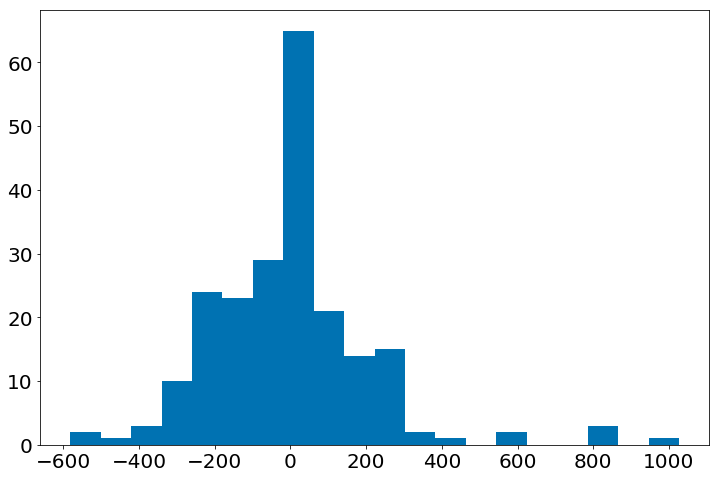

In [10]:
plt.hist(y - y_bar, bins=20)

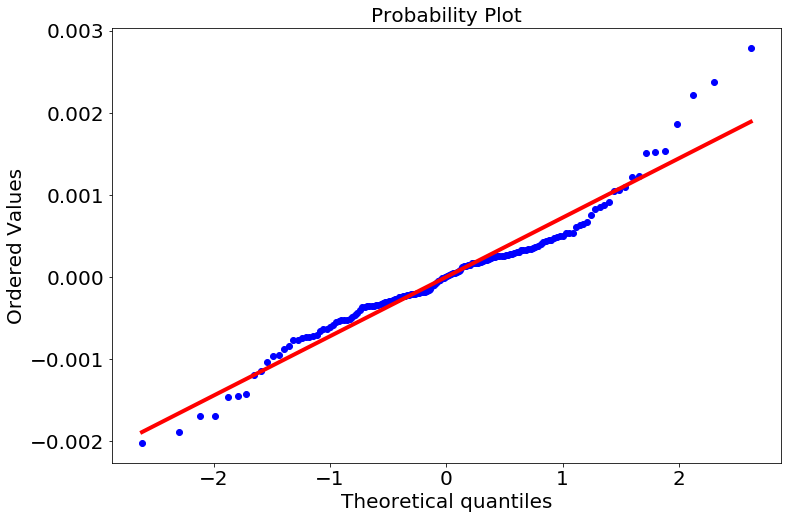

In [53]:
ss.probplot(y - y_bar, plot=plt.gca());

Abaixo temos a dispersão dos dados

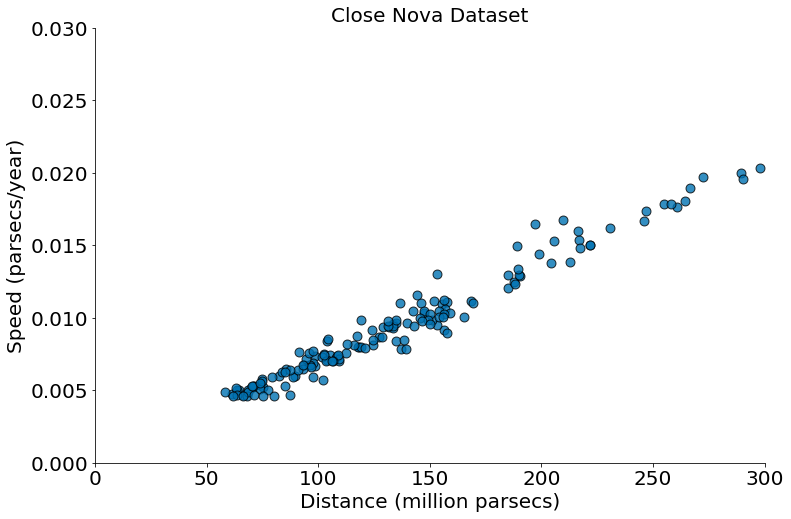

In [12]:
df = pd.read_csv('close_novas.csv')
x = df.values[:, 0]
y = df.values[:, 1]

plt.scatter(x, y, alpha=0.8, edgecolors='k', s=80)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.xlim((0, 300))
plt.ylim((0, 0.03))
plt.title('Close Nova Dataset')
despine()

In [13]:
1e6 / (ss.pearsonr(x, y)[0] * y.std(ddof=1) / x.std(ddof=1))

14612822334.220749

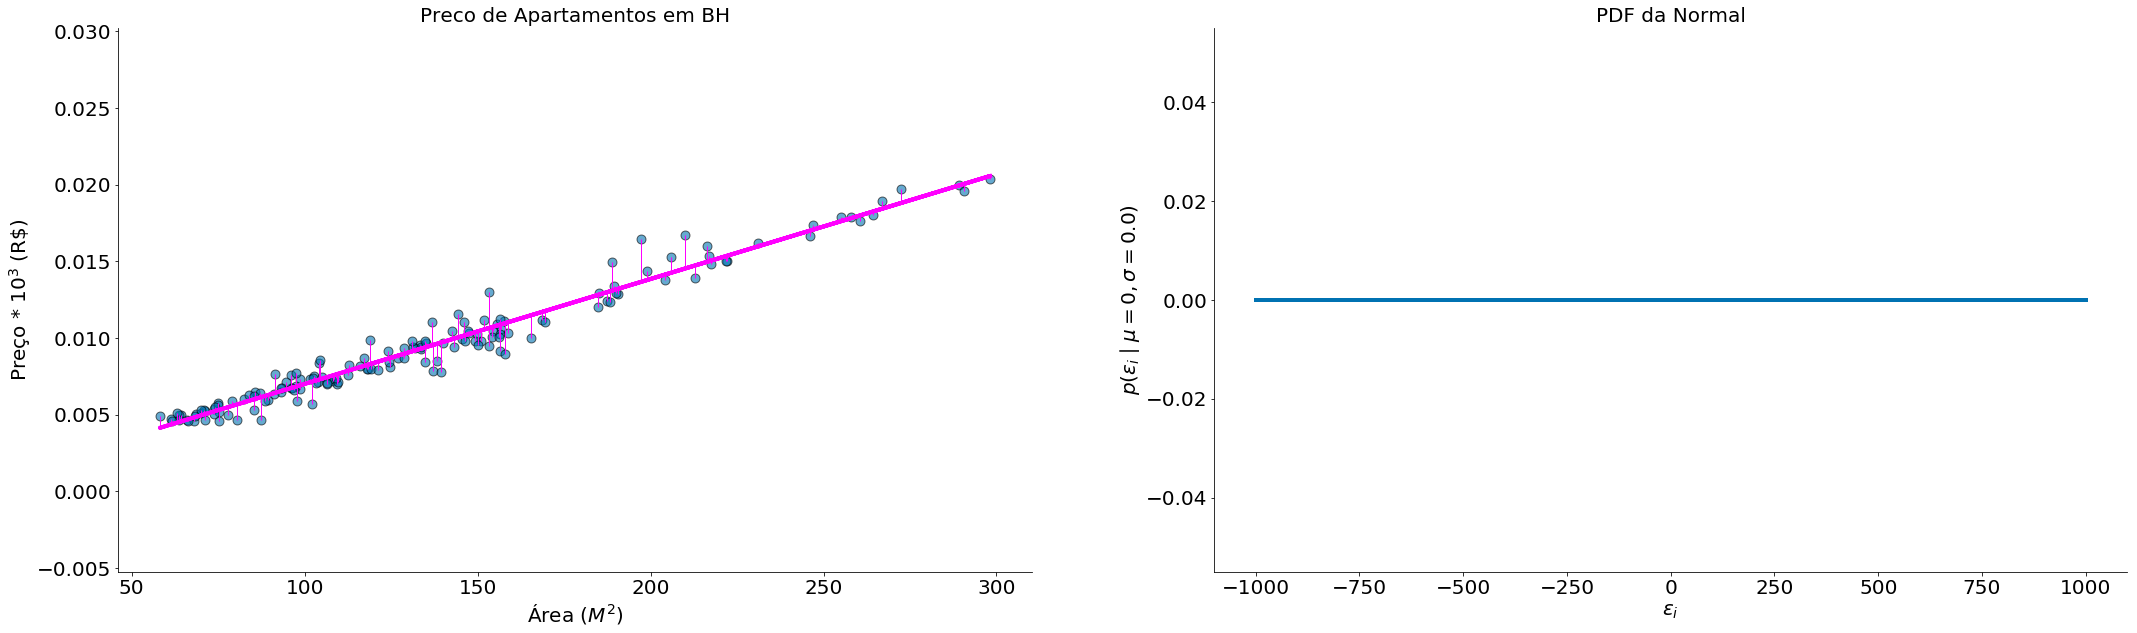

In [54]:
x = df['Distance (million parsecs)']
y = df['Speed (parsecs/year)']

model = ss.linregress(x, y)
beta = model.slope
alpha = model.intercept

fig = plt.figure(figsize=(36, 10))



plt.subplot(121)
plt.scatter(x, y, edgecolors='k', s=80, alpha=0.6)
plt.title('Preco de Apartamentos em BH')
plt.ylabel(r'Preço * $10^3$ (R\$)')
plt.xlabel(r'Área ($M^2$)')

y_bar = x * beta + alpha
plt.plot(x, y_bar, color='magenta')

y_min = [min(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
y_max = [max(y_i, y_bar_i) for y_i, y_bar_i in zip(y, y_bar)]
plt.vlines(x, ymin=y_min, ymax=y_max, color='magenta', lw=1)

despine()

plt.subplot(122)
plt.title('PDF da Normal')
ei_x = np.linspace(-1000, 1000, 100)
sigma = (y - y_bar).std(ddof=1)
plt.plot(ei_x, ss.distributions.norm.pdf(ei_x, scale=sigma))
plt.xlabel(r'$\epsilon_i$')
plt.ylabel(r'$p(\epsilon_i \mid \mu=0, \sigma={})$'.format(np.round(sigma, 2)))
despine()

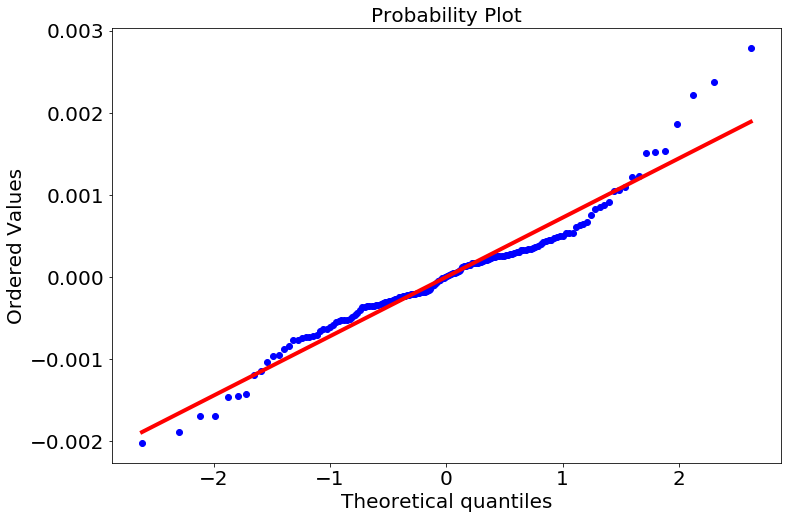

In [57]:
ss.probplot(y - y_bar, plot=plt);